In [231]:
# 라이브러리 추가
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import matplotlib
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [232]:
# 폰트 꺠짐 방지
font_path = 'C:/windows/Fonts/gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

In [233]:
# 데이터 로드
kospi_df = pd.read_csv('./data/Kospi 50 Historical Data.csv')
usd_krw_df = pd.read_csv('./data/USD_KRW Historical Data.csv')
gold_data = pd.read_csv('./data/Gold Price (2013-2023).csv')
btc_df = pd.read_csv('./data/BTC_USD.csv')
snp_df = pd.read_csv('./data/snp500.csv')

In [234]:
# 데이터 전처리
# 불필요 항목 제거, Price가 없는 데이터는 High와 Low 평균으로 생성 
kospi_df.drop(['Open', 'High', 'Low', 'Vol.', 'Change %'], axis=1, inplace=True)
kospi_df['Date'] = pd.to_datetime(kospi_df['Date'], format='%m/%d/%Y').dt.strftime('%Y-%m-%d')
usd_krw_df.drop(['Open', 'High', 'Low', 'Vol.', 'Change %'], axis=1, inplace=True)
usd_krw_df['Date'] = pd.to_datetime(usd_krw_df['Date'], format='%m/%d/%Y').dt.strftime('%Y-%m-%d')
gold_data.drop(['Open', 'High', 'Low', 'Vol.', 'Change %'], axis=1, inplace=True)
gold_data['Date'] = pd.to_datetime(gold_data['Date'], format='%m/%d/%Y').dt.strftime('%Y-%m-%d')
btc_df.drop(['Open', 'High', 'Low', 'Vol.', 'Change %'], axis=1, inplace=True)
btc_df['Date'] = pd.to_datetime(btc_df['Date'], format='%m/%d/%Y').dt.strftime('%Y-%m-%d')
snp_df.drop(['Volume', 'Dividends', 'Stock Splits', 'Close', 'Open'], axis=1, inplace=True)
snp_df['Date'] = snp_df['Date'].str.split(' ').str[0]
snp_df['Price'] = (snp_df['High'] + snp_df['Low']) / 2
snp_df.drop(['High', 'Low'], axis=1, inplace=True)
# 날짜 오름차순
kospi_df = kospi_df.sort_values(by='Date', ascending=True).reset_index(drop=True)
usd_krw_df = usd_krw_df.sort_values(by='Date', ascending=True).reset_index(drop=True)
gold_data = gold_data.sort_values(by='Date', ascending=True).reset_index(drop=True)
btc_df = btc_df.sort_values(by='Date', ascending=True).reset_index(drop=True)


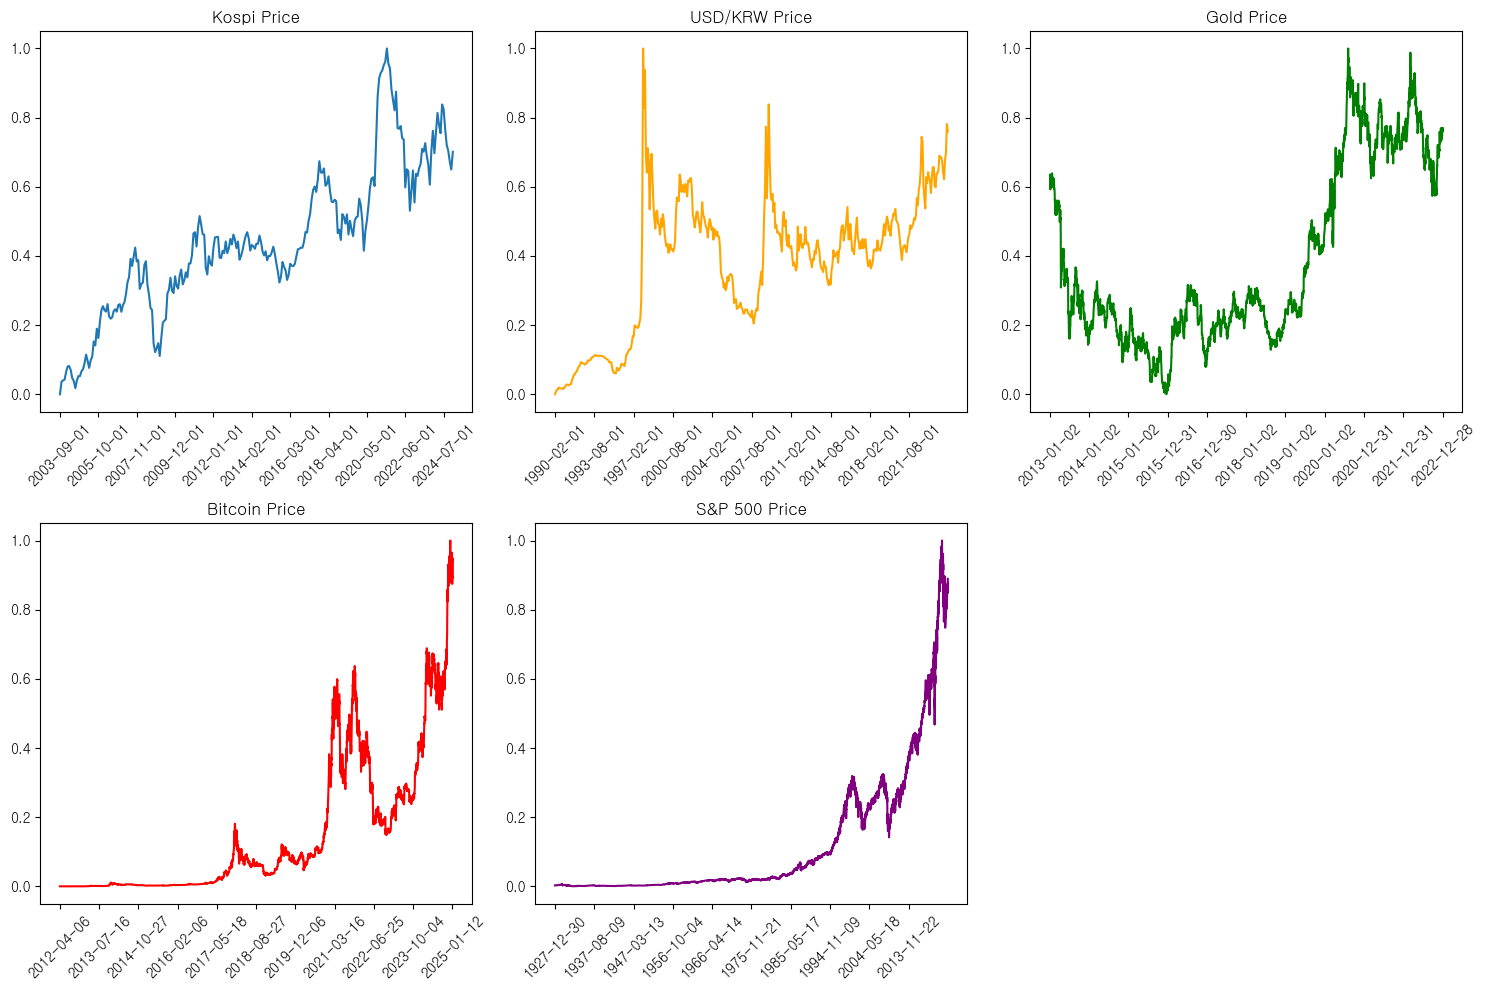

In [235]:
# 시각화 

# 'Price' 열을 먼저 문자열로 변환 후, 쉼표 제거하고 실수형으로 변환
kospi_df['Price'] = kospi_df['Price'].astype(str).str.replace(',', '').astype(float)
usd_krw_df['Price'] = usd_krw_df['Price'].astype(str).str.replace(',', '').astype(float)
gold_data['Price'] = gold_data['Price'].astype(str).str.replace(',', '').astype(float)
btc_df['Price'] = btc_df['Price'].astype(str).str.replace(',', '').astype(float)
snp_df['Price'] = snp_df['Price'].astype(str).str.replace(',', '').astype(float)

# Min-Max Scaler 적용

scaler = MinMaxScaler()

kospi_df['Normalized Price'] = scaler.fit_transform(kospi_df[['Price']])
usd_krw_df['Normalized Price'] = scaler.fit_transform(usd_krw_df[['Price']])
gold_data['Normalized Price'] = scaler.fit_transform(gold_data[['Price']])
btc_df['Normalized Price'] = scaler.fit_transform(btc_df[['Price']])
snp_df['Normalized Price'] = scaler.fit_transform(snp_df[['Price']])

plt.figure(figsize=(15, 10))

# Kospi
plt.subplot(231)
plt.plot(kospi_df['Date'], kospi_df['Normalized Price'], label='Kospi')
plt.title('Kospi Price')
plt.xticks(kospi_df['Date'][::max(1, len(kospi_df) // 10)], rotation=45)

# USD/KRW
plt.subplot(232)
plt.plot(usd_krw_df['Date'], usd_krw_df['Normalized Price'], label='USD/KRW', color='orange')
plt.title('USD/KRW Price')
plt.xticks(usd_krw_df['Date'][::max(1, len(usd_krw_df) // 10)], rotation=45)

# Gold
plt.subplot(233)
plt.plot(gold_data['Date'], gold_data['Normalized Price'], label='Gold', color='green')
plt.title('Gold Price')
plt.xticks(gold_data['Date'][::max(1, len(gold_data) // 10)], rotation=45)

# BTC
plt.subplot(234)
plt.plot(btc_df['Date'], btc_df['Normalized Price'], label='Bitcoin', color='red')
plt.title('Bitcoin Price')
plt.xticks(btc_df['Date'][::max(1, len(btc_df) // 10)], rotation=45)

# S&P 500
plt.subplot(235)
plt.plot(snp_df['Date'], snp_df['Normalized Price'], label='S&P 500', color='purple')
plt.title('S&P 500 Price')
plt.xticks(snp_df['Date'][::max(1, len(snp_df) // 10)], rotation=45)

plt.tight_layout()
plt.show()


In [236]:
# 날짜 이슈
print("Kospi Date Range:", kospi_df['Date'].min(), "to", kospi_df['Date'].max())
print("USD/KRW Date Range:", usd_krw_df['Date'].min(), "to", usd_krw_df['Date'].max())
print("Gold Date Range:", gold_data['Date'].min(), "to", gold_data['Date'].max())
print("Bitcoin Date Range:", btc_df['Date'].min(), "to", btc_df['Date'].max())
print("S&P 500 Date Range:", snp_df['Date'].min(), "to", snp_df['Date'].max())

Kospi Date Range: 2003-09-01 to 2025-01-01
USD/KRW Date Range: 1990-02-01 to 2025-01-01
Gold Date Range: 2013-01-02 to 2022-12-30
Bitcoin Date Range: 2012-04-06 to 2025-01-16
S&P 500 Date Range: 1927-12-30 to 2023-06-02


In [237]:
# 공통 날짜만 남기기
kospi_df['Date'] = pd.to_datetime(kospi_df['Date'])
usd_krw_df['Date'] = pd.to_datetime(usd_krw_df['Date'])
gold_data['Date'] = pd.to_datetime(gold_data['Date'])
btc_df['Date'] = pd.to_datetime(btc_df['Date'])
snp_df['Date'] = pd.to_datetime(snp_df['Date'])

common_dates = set(btc_df['Date']).intersection(
    set(kospi_df['Date'])).intersection(
    set(usd_krw_df['Date'])).intersection(
    set(gold_data['Date'])).intersection(
    set(snp_df['Date']))

kospi_df = kospi_df[kospi_df['Date'].isin(common_dates)]
usd_krw_df = usd_krw_df[usd_krw_df['Date'].isin(common_dates)]
gold_data = gold_data[gold_data['Date'].isin(common_dates)]
btc_df = btc_df[btc_df['Date'].isin(common_dates)]
snp_df = snp_df[snp_df['Date'].isin(common_dates)]

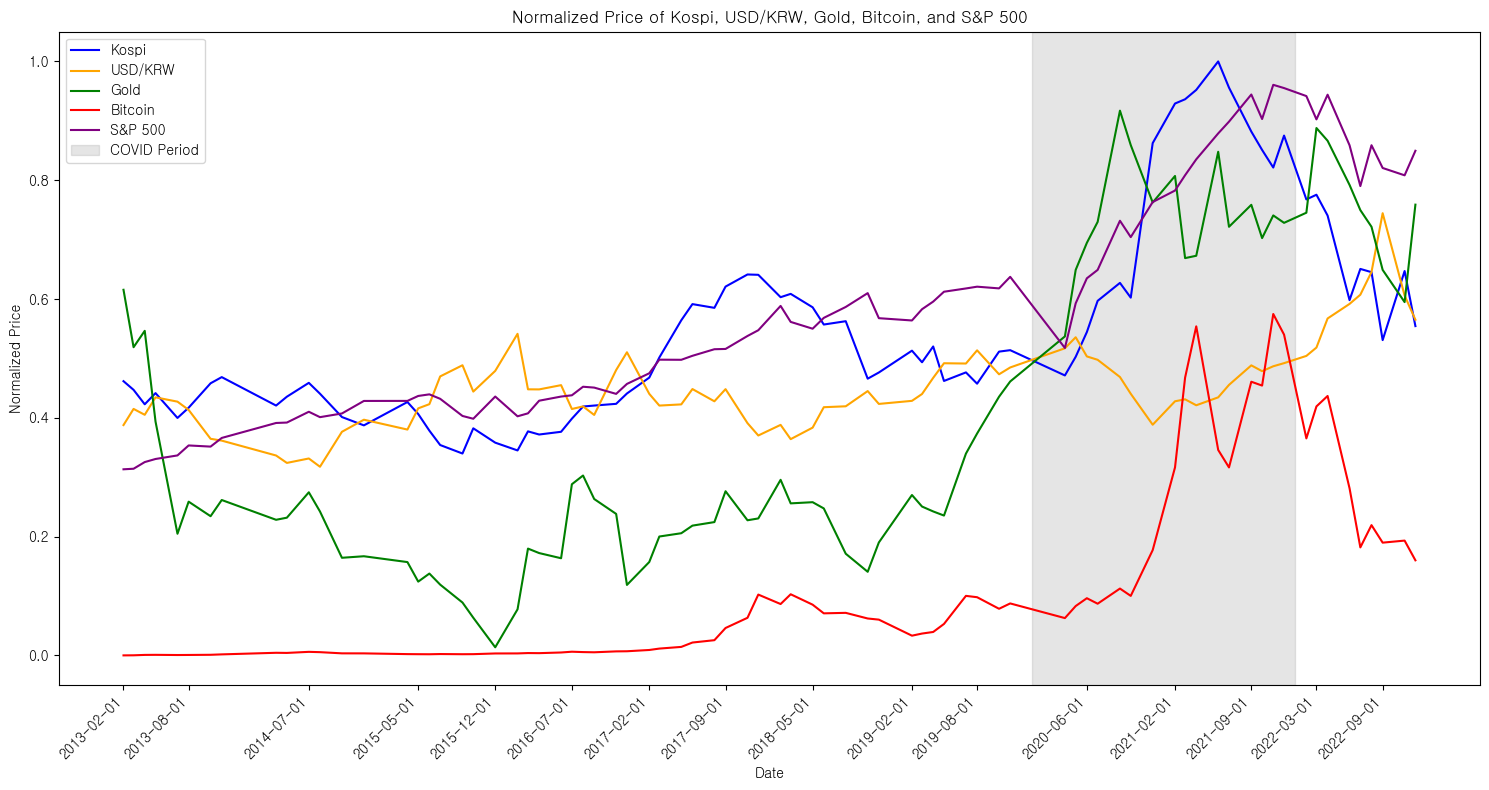

In [238]:
# 그래프 크기 설정
plt.figure(figsize=(15, 8))

# 각 데이터셋을 하나의 그래프에 그리기
plt.plot(kospi_df['Date'], kospi_df['Normalized Price'], label='Kospi', color='blue')
plt.plot(usd_krw_df['Date'], usd_krw_df['Normalized Price'], label='USD/KRW', color='orange')
plt.plot(gold_data['Date'], gold_data['Normalized Price'], label='Gold', color='green')
plt.plot(btc_df['Date'], btc_df['Normalized Price'], label='Bitcoin', color='red')
plt.plot(snp_df['Date'], snp_df['Normalized Price'], label='S&P 500', color='purple')

# x축 날짜 레이블 간격을 5개로 설정 (필요에 따라 변경)
plt.xticks(kospi_df['Date'][::5], rotation=45, ha='right')

# 코로나 기간 강조 (예: 2020년 1월 - 2021년 12월)
plt.axvspan(pd.to_datetime('2020-01-01'), pd.to_datetime('2021-12-31'), color='gray', alpha=0.2, label='COVID Period')

# 그래프 제목과 레이블 설정
plt.title('Normalized Price of Kospi, USD/KRW, Gold, Bitcoin, and S&P 500')
plt.xlabel('Date')
plt.ylabel('Normalized Price')

# 범례 추가
plt.legend()

# 그래프 레이아웃 조정
plt.tight_layout()

# 그래프 출력
plt.show()
